## Import & Conf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings('ignore')

# Build the api

In [2]:
headers = {
  'Referer': 'https://stats.nba.com/players/shots-dribbles',
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
  'x-nba-stats-origin': 'stats'
}

In [3]:
def get_shooting_stats(  url="http://stats.nba.com/stats/leaguedashplayerptshot?",
                PerMode="PerGame",
                LeagueID = "00",
                Season = "2019-20",
                SeasonType = "Regular Season",
                PORound= 0,
                CloseDefDistRange= '',
                ShotClockRange='',
                ShotDistRange= '',#'> 5',
                TouchTimeRange= '',
                DribbleRange= "0 Dribbles",
                GeneralRange= '',
                TeamID= 0,
                Outcome= '',
                Location= '',
                Month= 0,
                SeasonSegment= '',
                DateFrom= '',
                DateTo= '',
                OpponentTeamID= 0,
                VsConference= '',
                VsDivision= '',
                Conference= '',
                Division= '',
                GameSegment= '',
                Period= 0,
                LastNGames= 0):
    url = url
    api_param = {
    "PerMode": PerMode,
    "LeagueID": LeagueID,
    "Season": Season,
    "SeasonType": SeasonType,
    "PORound": PORound,
    "CloseDefDistRange": CloseDefDistRange,#'0-2 Feet - Very Tight',
    "ShotClockRange":ShotClockRange,
    "ShotDistRange": ShotDistRange,#'> 5',
    "TouchTimeRange": TouchTimeRange,
    "DribbleRange": DribbleRange,
    "GeneralRange": GeneralRange,
    "TeamID": TeamID,
    "Outcome": Outcome,
    "Location": Location,
    "Month": Month,
    "SeasonSegment": SeasonSegment,
    "DateFrom": DateFrom,
    "DateTo": DateTo,
    "OpponentTeamID": OpponentTeamID,
    "VsConference": VsConference,
    "VsDivision": VsDivision,
    "Conference": Conference,
    "Division": Division,
    "GameSegment": GameSegment,
    "Period": Period,
    "LastNGames": LastNGames
    }
    payload = {}
    response = requests.request("GET",url,params=api_param,headers=headers,data = payload)
    data = response.json()
    df = pd.DataFrame(data['resultSets'][0]['rowSet'],columns=data['resultSets'][0]['headers'])
    df["Season"] = Season
    df["CloseDefDistRange"] = CloseDefDistRange
    df["DribbleRange"] = DribbleRange
    return df

def seasons_string(start,end):
    '''
    creates a list of NBA seasons from start-end
    '''
    years = np.arange(start,end+1)
    seasons = []
    for year in years:
        string1 = str(year)
        string2 = str(year+1)
        season = '{}-{}'.format(string1,string2[-2:])
        seasons.append(season)
    return seasons

def get_usg_stats(  url="http://stats.nba.com/stats/leaguedashplayerstats?",
                MeasureType= "Advanced",
                PerMode= "PerGame",
                PlusMinus= "N",
                PaceAdjust= "N",
                Rank= "N",
                LeagueID= "00",
                Season= "2019-20",
                SeasonType= "Regular Season",
                PORound= 0,
                Outcome= '',
                Location= '',
                Month= 0,
                SeasonSegment= '',
                DateFrom= '',
                DateTo= '',
                OpponentTeamID= 0,
                VsConference= '',
                VsDivision= '',
                TeamID= 0,
                Conference= '',
                Division= '',
                GameSegment= '',
                Period= 0,
                ShotClockRange= '',
                LastNGames= 0,
                GameScope= '',
                PlayerExperience= '',
                PlayerPosition= '',
                StarterBench= '',
                DraftYear= '',
                DraftPick= '',
                College= '',
                Country= '',
                Height= '',
                Weight= '',
                TwoWay= 0):
    url = url
    api_param = {
    "MeasureType":MeasureType,
    "PerMode":PerMode,
    "PlusMinus":PlusMinus,
    "PaceAdjust":PaceAdjust,
    "Rank":Rank,
    "LeagueID":LeagueID,
    "Season":Season,
    "SeasonType":SeasonType,
    "PORound":PORound,
    "Outcome":Outcome,
    "Location":Location,
    "Month":Month,
    "SeasonSegment":SeasonSegment,
    "DateFrom":DateFrom,
    "DateTo":DateTo,
    "OpponentTeamID":OpponentTeamID,
    "VsConference":VsConference,
    "VsDivision":VsDivision,
    "TeamID":TeamID,
    "Conference":Conference,
    "Division":Division,
    "GameSegment":GameSegment,
    "Period":Period,
    "ShotClockRange":ShotClockRange,
    "LastNGames":LastNGames,
    "GameScope":GameScope,
    "PlayerExperience":PlayerExperience,
    "PlayerPosition":PlayerPosition,
    "StarterBench":StarterBench,
    "DraftYear":DraftYear,
    "DraftPick":DraftPick,
    "College":College,
    "Country":Country,
    "Height":Height,
    "Weight":Weight,
    "TwoWay":TwoWay
    }
    payload = {}
    response = requests.request("GET",url,params=api_param,headers=headers,data = payload)
    data = response.json()
    df = pd.DataFrame(data['resultSets'][0]['rowSet'],columns=data['resultSets'][0]['headers'])
    df["Season"] = Season
#     df["CloseDefDistRange"] = CloseDefDistRange
#     df["DribbleRange"] = DribbleRange
    return df


def get_def_diff_pct_stats(url="https://stats.nba.com/stats/leaguedashptdefend?",
                PerMode= "PerGame",
                LeagueID= "00",
                Season= "2019-20",
                SeasonType= "Regular Season",
                PORound= 0,
                PlayerID= '',
                TeamID= 0,
                Outcome= '',
                Location= '',
                Month= 0,
                SeasonSegment= '',
                DateFrom= '',
                DateTo= '',
                OpponentTeamID= 0,
                VsConference= '',
                VsDivision= '',
                Conference= '',
                Division= '',
                GameSegment= '',
                Period= 0,
                LastNGames= 0,
                DraftYear= '',
                DraftPick= '',
                College= '',
                Country= '',
                Height= '',
                Weight= '',
                PlayerExperience= '',
                PlayerPosition= '',
                StarterBench= '',
                DefenseCategory= "Overall"):
    url = url
    api_param = {
    "PerMode":PerMode,
    "LeagueID":LeagueID,
    "Season":Season,
    "SeasonType":SeasonType,
    "PORound":PORound,
    "PlayerID":PlayerID,
    "TeamID":TeamID,
    "Outcome":Outcome,
    "Location":Location,
    "Month":Month,
    "SeasonSegment":SeasonSegment,
    "DateFrom":DateFrom,
    "DateTo":DateTo,
    "OpponentTeamID":OpponentTeamID,
    "VsConference":VsConference,
    "VsDivision":VsDivision,
    "Conference":Conference,
    "Division":Division,
    "GameSegment":GameSegment,
    "Period":Period,
    "LastNGames":LastNGames,
    "DraftYear":DraftYear,
    "DraftPick":DraftPick,
    "College":College,
    "Country":Country,
    "Height":Height,
    "Weight":Weight,
    "PlayerExperience":PlayerExperience,
    "PlayerPosition":PlayerPosition,
    "StarterBench":StarterBench,
    "DefenseCategory":DefenseCategory
}

    payload = {}
    response = requests.request("GET",url,params=api_param,headers=headers,data = payload)
    data = response.json()
    df = pd.DataFrame(data['resultSets'][0]['rowSet'],columns=data['resultSets'][0]['headers'])
    df["Season"] = Season
#     df["CloseDefDistRange"] = CloseDefDistRange
#     df["DribbleRange"] = DribbleRange
    return df
    
def get_shooting_stats(  url="http://stats.nba.com/stats/leaguedashplayerptshot?",
                PerMode="PerGame",
                LeagueID = "00",
                Season = "2019-20",
                SeasonType = "Regular Season",
                PORound= 0,
                CloseDefDistRange= '',
                ShotClockRange='',
                ShotDistRange= '',#'> 5',
                TouchTimeRange= '',
                DribbleRange= "0 Dribbles",
                GeneralRange= '',
                TeamID= 0,
                Outcome= '',
                Location= '',
                Month= 0,
                SeasonSegment= '',
                DateFrom= '',
                DateTo= '',
                OpponentTeamID= 0,
                VsConference= '',
                VsDivision= '',
                Conference= '',
                Division= '',
                GameSegment= '',
                Period= 0,
                LastNGames= 0):
    url = url
    api_param = {
    "PerMode": PerMode,
    "LeagueID": LeagueID,
    "Season": Season,
    "SeasonType": SeasonType,
    "PORound": PORound,
    "CloseDefDistRange": CloseDefDistRange,#'0-2 Feet - Very Tight',
    "ShotClockRange":ShotClockRange,
    "ShotDistRange": ShotDistRange,#'> 5',
    "TouchTimeRange": TouchTimeRange,
    "DribbleRange": DribbleRange,
    "GeneralRange": GeneralRange,
    "TeamID": TeamID,
    "Outcome": Outcome,
    "Location": Location,
    "Month": Month,
    "SeasonSegment": SeasonSegment,
    "DateFrom": DateFrom,
    "DateTo": DateTo,
    "OpponentTeamID": OpponentTeamID,
    "VsConference": VsConference,
    "VsDivision": VsDivision,
    "Conference": Conference,
    "Division": Division,
    "GameSegment": GameSegment,
    "Period": Period,
    "LastNGames": LastNGames
    }
    payload = {}
    response = requests.request("GET",url,params=api_param,headers=headers,data = payload)
    data = response.json()
    df = pd.DataFrame(data['resultSets'][0]['rowSet'],columns=data['resultSets'][0]['headers'])
    df["Season"] = Season
    df["CloseDefDistRange"] = CloseDefDistRange
    df["DribbleRange"] = DribbleRange
    return df

# Conf

In [4]:
minimum_minuites = 20 * 50
start_season = 2017
end_season = 2019

## functions

In [5]:
def minuites_filter(df):
    return df[(df["SUM_MIN"] > minimum_minuites)]

## Shooting analytics

## Conf

In [55]:
min_shots_attempts = 150
dribbles = ["0 Dribbles","1 Dribble"]
CloseDefDistRanges = ['4-6 Feet - Open'] #['0-2 Feet - Very Tight','2-4 Feet - Tight','4-6 Feet - Open','']#['4-6 Feet - Open']#
relevant_3pt_columns = ["PLAYER_NAME","GP","TOTAL_ATTEMPTS","CloseDefDistRange","DribbleRange","TOTAL_MADE","Season"]

## Read From API

In [7]:
df = []
all_shots_df = []
for season in seasons_string(start_season,end_season):
    all_shots_df.append(get_shooting_stats(Season=season,CloseDefDistRange='',DribbleRange=''))
    for dribble in dribbles:
        for closeDefDistRange in CloseDefDistRanges:
            df.append(get_shooting_stats(Season=season,CloseDefDistRange=closeDefDistRange,DribbleRange=dribble))
shooting_stats_df = pd.concat([x for x in df],ignore_index=True)
all_shots_df = pd.concat([x for x in all_shots_df],ignore_index=True)


## Aggregate attempts - enganeering

In [8]:
df_3pt = shooting_stats_df
df_3pt["TOTAL_ATTEMPTS"] = round(df_3pt["GP"] * df_3pt["FG3A"])
df_3pt["TOTAL_MADE"]     = round(df_3pt["GP"] * df_3pt["FG3M"])


In [9]:
all_shots_df["TOTAL_3S"]    = round(all_shots_df["GP"] * all_shots_df["FG3A"])
all_shots_df["TOTAL_SHOTS"] = all_shots_df["GP"] * all_shots_df["FGA"]

## Group data to last season

In [10]:
df_3pt_summary = df_3pt[relevant_3pt_columns].groupby("PLAYER_NAME",as_index=False).sum()
df_3pt_summary["3PT_PCT"] = df_3pt_summary["TOTAL_MADE"] / df_3pt_summary["TOTAL_ATTEMPTS"]

In [11]:
all_shots_summary = all_shots_df.groupby("PLAYER_NAME",as_index=False).sum()
all_shots_summary["FREQ_PCT"] = all_shots_summary["TOTAL_3S"] / all_shots_summary["TOTAL_SHOTS"]
df_3pt_frequency = all_shots_summary[["FREQ_PCT","PLAYER_NAME"]]

## add 3pt frequency to our 3pt shots

In [51]:
df_3pt_freq_pct = df_3pt_summary.merge(df_3pt_frequency)


## Calculate avargaes to filter data

In [13]:
avg_3pt_freq = (all_shots_summary["TOTAL_3S"].sum() / all_shots_summary["TOTAL_SHOTS"].sum())
avg_shooting_pct = (df_3pt_freq_pct["TOTAL_MADE"].sum() / df_3pt_freq_pct["TOTAL_ATTEMPTS"].sum())

## Filter data

In [58]:
min_attemps_filter = df_3pt_freq_pct["TOTAL_ATTEMPTS"] > min_shots_attempts
above_avg_freq_filter = df_3pt_freq_pct["FREQ_PCT"] > avg_3pt_freq
df_3pt_freq_pct_filtered = df_3pt_freq_pct[min_attemps_filter]
df_3pt_freq_pct_filtered = df_3pt_freq_pct_filtered[above_avg_freq_filter]
df_3pt_freq_pct_filtered = df_3pt_freq_pct_filtered.drop(["GP"],axis=1)


In [59]:
df_3pt_freq_pct_filtered[df_3pt_freq_pct_filtered["PLAYER_NAME"] == "Matisse Thybulle"]

,PLAYER_NAME,TOTAL_ATTEMPTS,TOTAL_MADE,3PT_PCT,FREQ_PCT


# Usage Analytics

## Conf

In [60]:
max_usg_pct = 0.25

## Read From API

In [61]:
df = []
for season in seasons_string(start_season,end_season):
    df.append(get_usg_stats(Season=season))
usg_stats_df = pd.concat([x for x in df],ignore_index=True)

## Calculate totals before group

In [88]:
usg_stats_df["TOTAL_USG"]     = usg_stats_df["USG_PCT"] * usg_stats_df["GP"] * usg_stats_df["MIN"]
usg_stats_df["TOTAL_AST_PCT"] = usg_stats_df["AST_PCT"] * usg_stats_df["GP"] * usg_stats_df["MIN"]
usg_stats_df["TOTAL_MIN"]     = usg_stats_df["GP"] * usg_stats_df["MIN"]

## Check for players that play in last season

In [63]:
relevant_season = usg_stats_df.groupby(["PLAYER_NAME"],as_index=False).max()[["PLAYER_NAME","Season"]]
relevant_season = relevant_season[relevant_season["Season"] == "2019-20"]

## Group data toghter and enganeering

In [64]:
usg_stats_summary = usg_stats_df.groupby("PLAYER_NAME",as_index=False).sum()

In [65]:
usg_stats_summary["USG_PCT"] = usg_stats_summary["TOTAL_USG"] / usg_stats_summary["TOTAL_MIN"]
usg_stats_summary["AST_PCT"] = usg_stats_summary["TOTAL_AST_PCT"] / usg_stats_summary["TOTAL_MIN"]

## Calculate avarage for filter and filer

In [66]:
ast_pct_avg = usg_stats_summary["AST_PCT"].mean()

In [67]:
usg_filter = usg_stats_summary["USG_PCT"] <= max_usg_pct
ast_filter = usg_stats_summary["AST_PCT"] <= ast_pct_avg
minuites_filter = usg_stats_summary["TOTAL_MIN"] >= minimum_minuites
usg_stats_summary_filtered = usg_stats_summary[usg_filter]
usg_stats_summary_filtered = usg_stats_summary_filtered[ast_filter]
usg_stats_summary_filtered = usg_stats_summary_filtered[minuites_filter]
usg_stats_summary_filtered = usg_stats_summary_filtered.merge(relevant_season,on="PLAYER_NAME")

## Merge usage and 3pt shots

In [100]:
usage_3pt_merge = df_3pt_freq_pct_filtered.merge(usg_stats_summary_filtered,on="PLAYER_NAME")
usage_3pt_merge[usage_3pt_merge["PLAYER_NAME"]== "Robert Covington"][["PLAYER_NAME","3PT_PCT","TOTAL_ATTEMPTS","FREQ_PCT","USG_PCT","AST_PCT"]].head(10)

,PLAYER_NAME,3PT_PCT,TOTAL_ATTEMPTS,FREQ_PCT,USG_PCT,AST_PCT
60,Robert Covington,0.35219,548.0,0.660412,0.166989,0.069096


# Mesure Defense - Old

## Conf 

In [69]:
# def_cols = ["PLAYER_NAME","PCT_PLUSMINUS","Season"]

## Read From API

In [70]:
# df = []
# for season in seasons_string(start_season,end_season):
#             df.append(get_def_diff_pct_stats(Season=season))
# def_stats_df = pd.concat([x for x in df],ignore_index=True)
# def_stats_df = def_stats_df[def_cols]
# def_stats_df["PCT_PLUSMINUS_CONVERTED"] = def_stats_df["PCT_PLUSMINUS"] * -100
# avg_def_metric = def_stats_df["PCT_PLUSMINUS_CONVERTED"].mean()
# usage_3pt_merge = usage_3pt_merge[usage_3pt_merge["Season"] == "2019-20"]
# def_3pt_usg_df = usage_3pt_merge.merge(def_stats_df,on=["PLAYER_NAME","Season"])
# def_3pt_usg_df[def_3pt_usg_df["PLAYER_NAME"] == "James Harden"]
# ax = def_3pt_usg_df.plot.scatter(x="3pt_PCT",y="PCT_PLUSMINUS_CONVERTED",figsize=(20,10))
# plt.axvline(avg_shooting_pct)
# plt.axhline(avg_def_metric)
# for i, txt in enumerate(def_3pt_usg_df.PLAYER_NAME):
#     ax.annotate(txt, (def_3pt_usg_df["3pt_PCT"].iat[i],def_3pt_usg_df["PCT_PLUSMINUS_CONVERTED"].iat[i]))
# plt.show()

## Mesure Defense - DRPM

## Read From API

In [125]:
rpm_df = pd.read_excel("rpm.xlsx")

## Calculate avg for graph

In [126]:
avg_rpm_df = rpm_df["DRPM"].mean()

In [130]:
rpm_3pt_usg_df = usage_3pt_merge.merge(rpm_df,on="PLAYER_NAME")

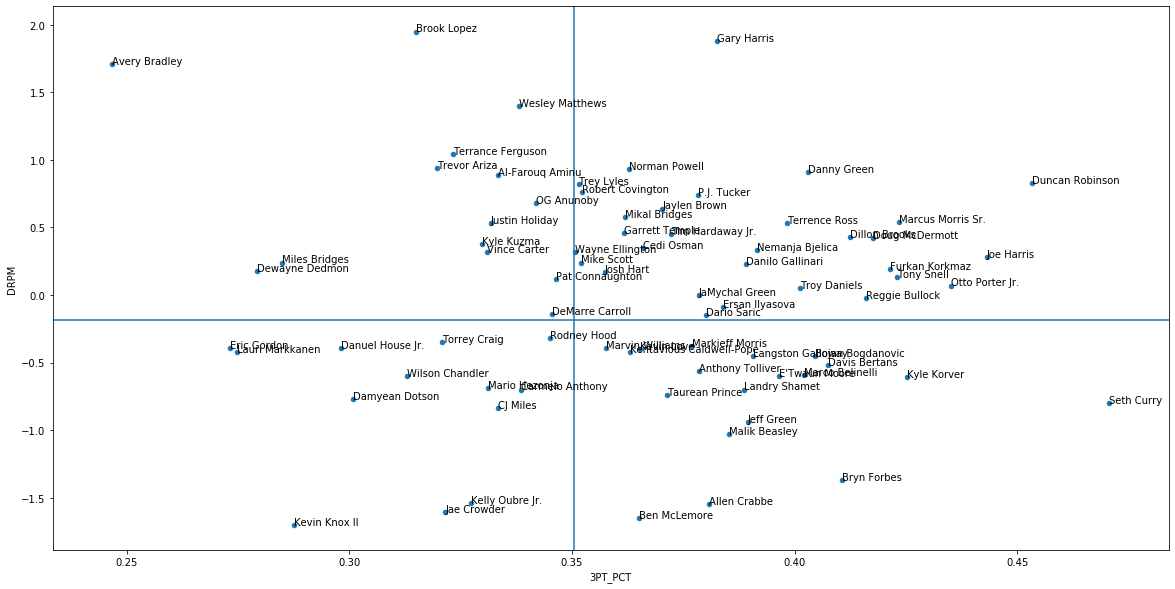

In [131]:
ax = rpm_3pt_usg_df.plot.scatter(x="3PT_PCT",y="DRPM",figsize=(20,10))
plt.axvline(avg_shooting_pct)
plt.axhline(avg_rpm_df)
for i, txt in enumerate(rpm_3pt_usg_df.PLAYER_NAME):
    ax.annotate(txt, (rpm_3pt_usg_df["3PT_PCT"].iat[i],rpm_3pt_usg_df["DRPM"].iat[i]))
plt.show()

## Calculate Rank for results

In [132]:
rpm_3pt_usg_df_ranking = rpm_3pt_usg_df
rpm_3pt_usg_df_ranking["DRPM_RANK"] = rpm_3pt_usg_df["DRPM"].rank(method='first',ascending=False)
rpm_3pt_usg_df_ranking["3PT_PCT_RANK"] = rpm_3pt_usg_df_ranking["3PT_PCT"].rank(method='first',ascending=False)

In [133]:
rpm_3pt_usg_df_ranking["TOTAL_RANK"] = (rpm_3pt_usg_df_ranking["DRPM_RANK"] + rpm_3pt_usg_df_ranking["3PT_PCT_RANK"])/2
rpm_3pt_usg_df_ranking = rpm_3pt_usg_df_ranking[["PLAYER_NAME","TOTAL_ATTEMPTS","TOTAL_MADE","3PT_PCT","FREQ_PCT","DRPM","DRPM_RANK","3PT_PCT_RANK","TOTAL_RANK"]]

## Find best players

In [134]:
rpm_3pt_usg_df_ranking_best = rpm_3pt_usg_df_ranking[rpm_3pt_usg_df_ranking["DRPM"] > avg_rpm_df]
rpm_3pt_usg_df_ranking_best = rpm_3pt_usg_df_ranking_best[rpm_3pt_usg_df_ranking["3PT_PCT"] > avg_shooting_pct]

In [135]:
rpm_3pt_usg_df_ranking_best.sort_values("TOTAL_RANK",ascending=True)

,PLAYER_NAME,TOTAL_ATTEMPTS,TOTAL_MADE,3PT_PCT,FREQ_PCT,DRPM,DRPM_RANK,3PT_PCT_RANK,TOTAL_RANK
21,Duncan Robinson,225.0,102.0,0.453333,0.873797,0.83,10.0,2.0,6.0
13,Danny Green,330.0,133.0,0.403030,0.658343,0.91,8.0,15.0,11.5
46,Marcus Morris Sr.,340.0,144.0,0.423529,0.433855,0.54,17.0,6.0,11.5
27,Gary Harris,298.0,114.0,0.382550,0.416349,1.88,2.0,27.0,14.5
32,Joe Harris,431.0,191.0,0.443155,0.546107,0.28,29.0,3.0,16.0
20,Doug McDermott,261.0,109.0,0.417625,0.490355,0.42,23.0,9.0,16.0
19,Dillon Brooks,257.0,106.0,0.412451,0.373718,0.43,22.0,11.0,16.5
65,Terrence Ross,339.0,135.0,0.398230,0.559571,0.53,19.0,18.0,18.5
25,Furkan Korkmaz,178.0,75.0,0.421348,0.608344,0.19,33.0,8.0,20.5
56,Otto Porter Jr.,262.0,114.0,0.435115,0.383828,0.07,38.0,4.0,21.0


## Find worst players

In [136]:
rpm_3pt_usg_df_ranking_worst = rpm_3pt_usg_df_ranking[rpm_3pt_usg_df_ranking["DRPM"] < avg_rpm_df]
rpm_3pt_usg_df_ranking_worst = rpm_3pt_usg_df_ranking_worst[rpm_3pt_usg_df_ranking["3PT_PCT"] < avg_shooting_pct]

In [137]:
rpm_3pt_usg_df_ranking_worst.sort_values("TOTAL_RANK",ascending=False).head(10)

,PLAYER_NAME,TOTAL_ATTEMPTS,TOTAL_MADE,3PT_PCT,FREQ_PCT,DRPM,DRPM_RANK,3PT_PCT_RANK,TOTAL_RANK
37,Kevin Knox II,233.0,67.0,0.287554,0.427944,-1.70,76.0,71.0,73.5
29,Jae Crowder,451.0,145.0,0.321508,0.620590,-1.61,74.0,64.0,69.0
11,Damyean Dotson,236.0,71.0,0.300847,0.499982,-0.77,66.0,69.0,67.5
35,Kelly Oubre Jr.,388.0,127.0,0.327320,0.421845,-1.54,72.0,62.0,67.0
75,Wilson Chandler,230.0,72.0,0.313043,0.491356,-0.60,60.0,68.0,64.0
43,Lauri Markkanen,393.0,108.0,0.274809,0.475361,-0.42,53.0,74.0,63.5
8,CJ Miles,255.0,85.0,0.333333,0.725029,-0.84,68.0,57.0,62.5
23,Eric Gordon,388.0,106.0,0.273196,0.650292,-0.39,49.0,75.0,62.0
47,Mario Hezonja,160.0,53.0,0.331250,0.393158,-0.69,62.0,59.0,60.5
14,Danuel House Jr.,161.0,48.0,0.298137,0.642920,-0.39,48.0,70.0,59.0
